In [1]:
import requests
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
import seaborn as sns
from sklearn.cluster import KMeans

In [21]:
response = requests.get(f"https://mgrey.se/espot?format=json&date=2022-{12}-{28}")
d = response.json()

In [22]:
hours = [i["hour"] for i in d["SE1"]]
price_eur = [i["price_eur"] for i in d["SE1"]]
price_sek = [i["price_sek"] for i in d["SE1"]]
kmeans = [i["kmeans"] for i in d["SE1"]]

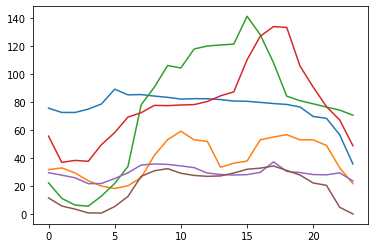

In [2]:
mat = []

for j in range(25,31):
    response = requests.get(f"https://mgrey.se/espot?format=json&date=2022-{12}-{j}")
    d = response.json()
    avgSum = []
    for k in d["SE1"]:
      avgSum.append(k["price_sek"])
    mat.append(avgSum)
    plt.plot(avgSum)

In [4]:
X = np.array(mat).T
Xmean = []
y=[]
time = 1

for i in X:
    i = list(i)
    for j in i:
        if j > np.mean(np.array(i))+(np.std(np.array(i))*3) or j < np.mean(np.array(i))-(np.std(np.array(i))*3):
            i.remove(j)
    i = np.array(i)
    Xmean.append(np.mean(i))
    y.append(time)
    time += 1

C:\Users\Shree\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


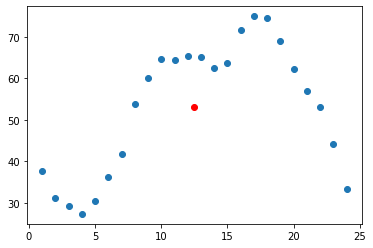

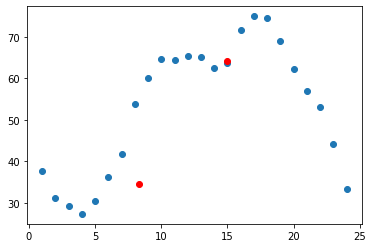

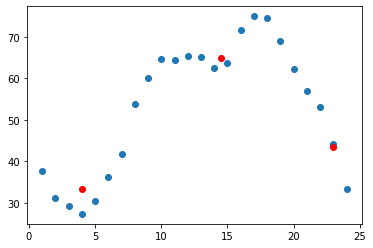

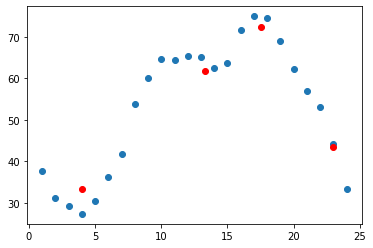

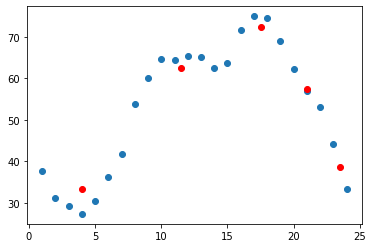

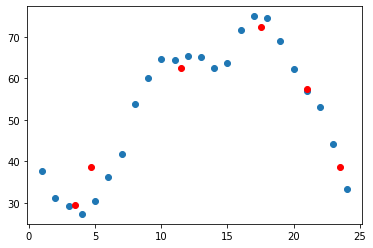

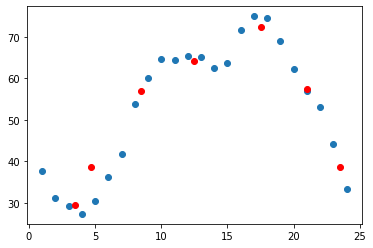

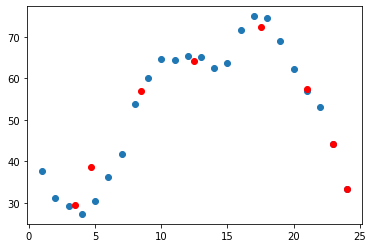

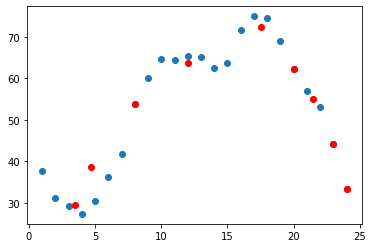

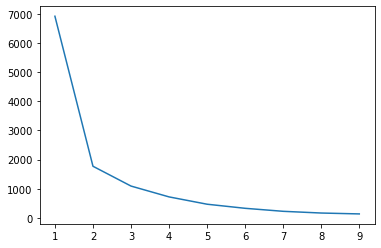

In [11]:
inters = []
Xmean = np.array(Xmean).reshape(-1,1)
train = np.hstack((Xmean, np.array(y).reshape(-1,1)))

for i in range(1, 10):

    kmeans = KMeans(n_clusters=i, random_state=0, max_iter = 300)

    kmeans.fit(train)

    inters.append(kmeans.inertia_)
    
    plt.scatter(x=y, y=Xmean)
    plt.scatter(x = np.array(kmeans.cluster_centers_)[:, 1], y = np.array(kmeans.cluster_centers_)[:, 0], color="red")
    plt.show()

plt.plot([1,2,3,4,5,6,7,8,9], inters)

In [33]:
final = KMeans(n_clusters=3, random_state=0, max_iter = 300)
final.fit(Xmean)

centers = np.sort(np.array(final.cluster_centers_).flatten())

print(centers)

[34.57462963 61.05363636 72.46333333]


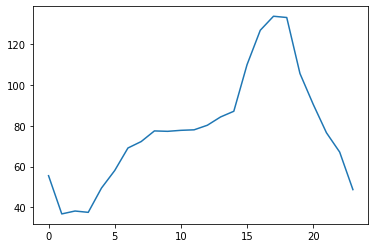

In [23]:
plt.plot(price_sek)

In [34]:
intervals = centers

m = []

for i in price_sek:
    if i <= intervals[0]:
        m.append(0)
    elif i > intervals[0] and i <= intervals[1]:
        m.append(1)
    elif i > intervals[1] and i <= intervals[2]:
        m.append(2)
    else:
        m.append(3)

print(m)

[1, 1, 1, 1, 1, 1, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 1]


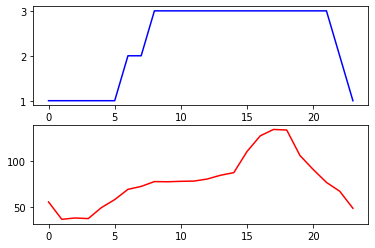

In [35]:
fig, axs = plt.subplots(2)
axs[0].plot(m, color="blue", label="preds")
axs[1].plot(price_sek, color="red", label="truth")



The problem is how far back one uses the data becuase the stochastic nature of the price means that relative to 2 months back the price might be really low but relative to 5 days back there might be a bit of change in when the price are the lowest and highest so the descion is how far back the relative comparison should be

Can also try to use anomaly detection as a method of finding too high prices